# WeRateDogs Data Wrangling

***by Amnah Samkari***

In [67]:
# Import all needed libraries

import numpy as np
import pandas as pd
import json
import time
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

## Gather

In [5]:
# Read flat files
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
image_prediction= pd.read_csv('image-predictions.tsv', sep = '\t')

# Read tweet's JSON file line by line to extract infromation
tweets_info = []
with open('tweet-json.txt', 'r') as json_file:
    for line in json_file:
        info = json.loads(line)
        
        # Append to list of dictionaries
        tweets_info.append({'tweet_id': info['id'],
                        'retweet_count': info['retweet_count'],
                        'favorite_count': info['favorite_count'],
                       })

# Create a DataFrame with tweet ID, retweet count, favorite count and tweet type
tweets_info = pd.DataFrame(tweets_info, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

## Assess

### Visually

In [6]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


### Programmatically

### Twitter Archive Data

Checking data both visually and programtically 

In [7]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


Here we can notice that the tweets in this archive starts from 15/Nov/2015 at 22:32 until 1/Aug/2017 around 16:24, and we can notice that the rating system was not always above 10.

In [9]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [11]:
twitter_archive['tweet_id'].nunique(), twitter_archive['timestamp'].nunique(), twitter_archive['expanded_urls'].nunique()

(2356, 2356, 2218)

In [12]:
twitter_archive['expanded_urls'].value_counts()

https://twitter.com/dog_rates/status/833124694597443584/photo/1,https://twitter.com/dog_rates/status/833124694597443584/photo/1,https://twitter.com/dog_rates/status/833124694597443584/photo/1                                                                    2
https://twitter.com/dog_rates/status/775733305207554048/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/837820167694528512/photo/1,https://twitter.com/dog_rates/status/837820167694528512/photo/1                                                                                                                                    2
https://twitter.com/dog_rates/status/704761120771465216/photo/1,https://twitter.com/dog_rates/status/704761120771465216/photo/1                                                                                          

In [13]:
twitter_archive['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [14]:
twitter_archive['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [15]:
twitter_archive['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [16]:
twitter_archive['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

### Image Prediction Data

In [17]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [18]:
image_prediction.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [19]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Tweets Info

In [20]:
tweets_info.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [21]:
tweets_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


#### Quality
***`twitter_archive` file:***

1. A number of retweets among the data.
2. Nominator type should be float.
3. Nominators like 9.5 and 13.5 are wrong (there are others).
4. Denominators other than 10.
5. Wrong dog names (mistaken for words). 
6. *`expanded_urls`* with no images.
7. duplicated images in *`expanded_urls`*.
8. *`timestamp`* in twitter_archive should be datetime.

***`image_prediction` file:***

9. Not all tweets in twitter_archive are in the image_prediction file (different number of records). 

#### Tideness
***`twitter_archive` file:***
1. Unneeded columns (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp) in twitter_archive.
2. Dog stages has four columns.
3. Gather all data into one dataframe



## Clean

In [22]:
#copy dataframes
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
tweets_info_clean= tweets_info.copy()

In [23]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Issue #1: Removing retweeted data 

#### Define
* Check retweeted_status_id column with non null values
* Omit these records 
* Drop all unwanted columns

#### Code

In [24]:
# Removing retweets entries
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]

#### Test

In [25]:
# Testing if retweets entries are deleted
sum(twitter_archive_clean['retweeted_status_id'].value_counts())

0

#### Code

In [26]:
# Drop retweets' columns
twitter_archive_clean = twitter_archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id',
                                                    'retweeted_status_timestamp'], axis=1)

#### Test

In [27]:
# Check if columns are dropped
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


### Issue #2: Fixing wrong rating entries

#### Define
* Fix *`rating_numerator`* type to float
* Delete tweets with no actual ratings
* Manually change wrong nominators and some denominators using Excel
* Programatically fix the rest of the ratings that are for multiple dogs

#### Code

In [28]:
# Change data type to float
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype(np.float16)

#### Test

In [29]:
# Check if data type is fixed
twitter_archive_clean['rating_numerator'].dtype

dtype('float16')

#### Code

In [30]:
# Delete tweets with no ratings
to_be_deleted = [810984652412424192, 832088576586297345, 855862651834028034, 682808988178739200, 686035780142297088]
twitter_archive_clean = twitter_archive_clean[~twitter_archive_clean['tweet_id'].isin(to_be_deleted)]

#### Test

In [31]:
# Check if no actual ratings tweets are deleted
sum(twitter_archive_clean['tweet_id'].isin(to_be_deleted))

0

#### Code

In [32]:
# Manually fix some ratings
ratings_fix = {835246439529840640: 13,
               666287406224695296: 9,
               681340665377193984: 9.5,
               883482846933004288: 13.5,
               881633300179243008: 13,
               680494726643068929: 11.26,
               778027034220126208: 11.27,
               786709082849828864: 9.75,
               740373189193256964: 14,
               682962037429899265: 10,
               722974582966214656: 13,
               716439118184652801: 11}

for tweet, num in ratings_fix.items():
    twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == tweet), 'rating_numerator'] = num 
    twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == tweet), 'rating_denominator'] = 10

#### Test

In [33]:
# Test if rating are fixed
twitter_archive_clean[twitter_archive_clean['tweet_id'].isin(ratings_fix)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.500000,10,Bella,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,13.000000,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,13.000000,10,None,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.750000,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.273438,10,Sophie,None,None,pupper,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,14.000000,10,None,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,13.000000,10,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,11.000000,10,Bluebert,None,None,None,None
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,10.000000,10,Darrel,None,None,None,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,9.500000,10,None,None,None,None,None


#### Code

In [34]:
# Fix ratings that are multiplied of 10
non_10s_index = twitter_archive_clean.index[twitter_archive_clean['rating_denominator']!=10].tolist()

for index in non_10s_index:
    divider = twitter_archive_clean.at[index,'rating_denominator']/10
    twitter_archive_clean.at[index,'rating_denominator'] = 10
    twitter_archive_clean.at[index,'rating_numerator'] = twitter_archive_clean.at[index,'rating_numerator']/divider

#### Test

In [35]:
# Test if rating are fixed
twitter_archive_clean.loc[non_10s_index]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,12.0,10,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,11.0,10,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,12.0,10,this,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,11.0,10,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,10.0,10,None,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,9.0,10,None,None,None,None,None
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,https://twitter.com/dog_rates/status/704054845...,12.0,10,a,None,None,None,None
1433,697463031882764288,NaN,NaN,2016-02-10 16:51:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a bucket of pups. 44/40...,https://twitter.com/dog_rates/status/697463031...,11.0,10,None,None,None,None,None
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",https://twitter.com/dog_rates/status/684225744...,11.0,10,None,None,None,None,None
1635,684222868335505415,NaN,NaN,2016-01-05 04:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,https://twitter.com/dog_rates/status/684222868...,11.0,10,None,None,None,None,None


### Issue #3: Fixing dog names

#### Define
* Change all wrong names to None

#### Code

In [36]:
# Change all wrong names to None
twitter_archive_clean.loc[twitter_archive_clean['name'].str.match('[a-z]+'),'name'] = 'None'

#### Test

In [37]:
# Check if  all wrong names to are changed to None
twitter_archive_clean[twitter_archive_clean['name'].str.match('[a-z]+')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #4: Fixing images URLs 

#### Define
* Delete duplicated data
* Delete tweets with no images

#### Code

In [38]:
# Drop all duplicated values
twitter_archive_clean = twitter_archive_clean[~twitter_archive_clean['expanded_urls'].duplicated()]

#### Test

In [39]:
# Check id all duplicated values are dropped
sum(twitter_archive_clean['expanded_urls'].duplicated())

0

#### Code

In [40]:
# Drop mssing images
twitter_archive_clean = twitter_archive_clean[~twitter_archive_clean['expanded_urls'].isna()]

#### Test

In [41]:
# Check if missing values are dropped
sum(twitter_archive_clean['expanded_urls'].isna())

0

### Issue #5: Fixing *`timestamp`* type

#### Define
* Change timestamp type from *str* to *datetime64*

#### Code

In [42]:
# Change timestamp type from str to datetime64
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean.timestamp)

#### Test

In [43]:
# Check if timestamp type is changed from str to datetime64
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2115 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2115 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2115 non-null datetime64[ns]
source                   2115 non-null object
text                     2115 non-null object
expanded_urls            2115 non-null object
rating_numerator         2115 non-null float16
rating_denominator       2115 non-null int64
name                     2115 non-null object
doggo                    2115 non-null object
floofer                  2115 non-null object
pupper                   2115 non-null object
puppo                    2115 non-null object
dtypes: datetime64[ns](1), float16(1), float64(2), int64(2), object(8)
memory usage: 235.5+ KB


### Issue #6: Merging dog stages to one column

#### Define
* Get the dog stage from the text column
* Create a new column for dog stage
* Drop the 4 stages

#### Code

In [44]:
# Obtain dog stages from 'text' column and put it in the new 'stage' column 
twitter_archive_clean['stage'] = twitter_archive_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')

# Drop the 4 columns
twitter_archive_clean = twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

/Users/amnah/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


#### Test

In [45]:
# check if new column with the stage is created and other 4 columns are deleted
twitter_archive_clean.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,None,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10,Jax,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10,None,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10,Zoey,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,doggo


### Issue #7: Dropping unwanted columns 

#### Define
* Drop all unwanted columns

#### Code

In [46]:
# Drop unwanted columns
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id','source',
                                                    'text'], axis=1)

#### Test

In [47]:
# Check the dataframe again
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2115 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2115 non-null int64
timestamp             2115 non-null datetime64[ns]
expanded_urls         2115 non-null object
rating_numerator      2115 non-null float16
rating_denominator    2115 non-null int64
name                  2115 non-null object
stage                 356 non-null object
dtypes: datetime64[ns](1), float16(1), int64(2), object(3)
memory usage: 119.8+ KB


### Issue #8: New prediction column with confidence level

#### Define

* Keep records in twitter_archive that have information in image prediction
* Take data from prediction table that are found in twitter_archive
* Sort both files by tweet_id
* Take the prediction of the max confidence level 
* Insert new column to the twitter archive data 

#### Code

In [48]:
# Drop records that do not have any prediction data 
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'].isin(image_prediction_clean['tweet_id'])]

# Drop predoction records that do not have any records in the twitter_archive file 
image_prediction_clean = image_prediction_clean[image_prediction_clean['tweet_id'].isin(twitter_archive_clean['tweet_id'])]

# Sort by tweet_id
twitter_archive_clean = twitter_archive_clean.sort_values(by=['tweet_id'], ascending=False)
image_prediction_clean = image_prediction_clean.sort_values(by=['tweet_id'], ascending=False)

#### Test

In [49]:
# Check if both files now have the same number of entries
twitter_archive_clean.shape, image_prediction_clean.shape

((1993, 7), (1993, 12))

#### Code

In [50]:
# Create new list with predications
predictions = []
max_conf = 0
prediction = 'Unknown'

# Find the max prdiction and append it to the list
for index, tweet in image_prediction_clean.iterrows():
    if tweet['p1_dog'] == True and tweet['p1_conf'] > max_conf:
        max_conf = tweet['p1_conf']
        prediction = tweet['p1']
    elif tweet['p2_dog'] == True and tweet['p2_conf'] > max_conf:
        max_conf = tweet['p2_conf']
        prediction = tweet['p2']
    elif tweet['p3_dog'] == True and tweet['p3_conf'] > max_conf:
        max_conf = tweet['p3_conf']
        prediction = tweet['p3']
    predictions.append(prediction)
                                  
# Add the new column to twitter_archive
twitter_archive_clean['breed'] = predictions

#### Test

In [51]:
# Check if the new column was added with its data
twitter_archive_clean

,tweet_id,timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,breed
0,892420643555336193,2017-08-01 16:23:56,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,Unknown
1,892177421306343426,2017-08-01 00:17:27,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,Chihuahua
2,891815181378084864,2017-07-31 00:18:03,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,Chihuahua
3,891689557279858688,2017-07-30 15:58:51,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN,Chihuahua
4,891327558926688256,2017-07-29 16:00:24,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,Chihuahua
5,891087950875897856,2017-07-29 00:08:17,https://twitter.com/dog_rates/status/891087950...,13.0,10,None,NaN,Chihuahua
6,890971913173991426,2017-07-28 16:27:12,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10,Jax,NaN,Chihuahua
7,890729181411237888,2017-07-28 00:22:40,https://twitter.com/dog_rates/status/890729181...,13.0,10,None,NaN,Chihuahua
8,890609185150312448,2017-07-27 16:25:51,https://twitter.com/dog_rates/status/890609185...,13.0,10,Zoey,NaN,Chihuahua
9,890240255349198849,2017-07-26 15:59:51,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,doggo,Chihuahua


### Issue #9: New columns for number of retweets and favorites

#### Define

* Keep records in twitter_archive that have information in image prediction
* Take data from tweets_info table that are found in twitter_archive
* Append those data to 2 lists
* Add the the new columns

#### Code

In [52]:
# Drop records that do not have any prediction data 
tweets_info_clean = tweets_info_clean[tweets_info_clean['tweet_id'].isin(twitter_archive_clean['tweet_id'])]

# Sort by tweet_id
tweets_info_clean = tweets_info_clean.sort_values(by=['tweet_id'], ascending=False)

#### Test

In [53]:
# Check if both files now have the same number of entries
twitter_archive_clean.shape, tweets_info_clean.shape

((1993, 8), (1993, 3))

#### Code

In [54]:
# Create new lists
retweets = []
favorites = []

# Append data
for index, tweet in tweets_info_clean.iterrows():
    retweets.append(tweet['retweet_count'])
    favorites.append(tweet['favorite_count'])
    
# Add the columns
twitter_archive_clean['retweet_count'] = retweets
twitter_archive_clean['favorite_count'] = favorites

#### Test

In [55]:
# Check if the new columns were added with its data
twitter_archive_clean

,tweet_id,timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,breed,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,Unknown,8853,39467
1,892177421306343426,2017-08-01 00:17:27,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,Chihuahua,6514,33819
2,891815181378084864,2017-07-31 00:18:03,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,Chihuahua,4328,25461
3,891689557279858688,2017-07-30 15:58:51,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN,Chihuahua,8964,42908
4,891327558926688256,2017-07-29 16:00:24,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,Chihuahua,9774,41048
5,891087950875897856,2017-07-29 00:08:17,https://twitter.com/dog_rates/status/891087950...,13.0,10,None,NaN,Chihuahua,3261,20562
6,890971913173991426,2017-07-28 16:27:12,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10,Jax,NaN,Chihuahua,2158,12041
7,890729181411237888,2017-07-28 00:22:40,https://twitter.com/dog_rates/status/890729181...,13.0,10,None,NaN,Chihuahua,16716,56848
8,890609185150312448,2017-07-27 16:25:51,https://twitter.com/dog_rates/status/890609185...,13.0,10,Zoey,NaN,Chihuahua,4429,28226
9,890240255349198849,2017-07-26 15:59:51,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,doggo,Chihuahua,7711,32467


## Save to a New File

In [56]:
# Save twitter dataframe to a CSV file
twitter_archive_clean.to_csv('twitter_archive_master.csv')

## Analysis
Here we will try to get some insights about the data set

In [57]:
# Load the new dataset
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

### Dogs ratings

Let's get some insights about the dogs ratings

In [62]:
twitter_archive_master['rating_numerator'].describe()

count    1993.000000
mean       11.650166
std        40.649048
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

There seems to be outliers, therefore lets try removing them and check the data again by visualizing it.

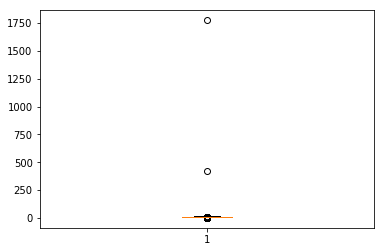

In [248]:
# Plot a boxplot with outliers
plt.boxplot(twitter_archive_master['rating_numerator']);


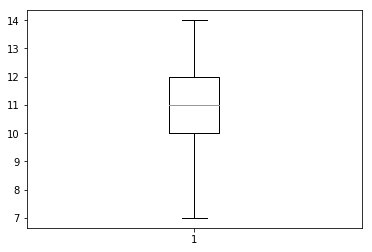

In [247]:
# Plot a boxplot without outliers
plt.boxplot(twitter_archive_master['rating_numerator'], showfliers=False);


Here we can see that the median rating is 11, while the mean suggest a rating between 11 and 12, so apperantly there are some dogs with unusual ratings for the max, in addition to the clear possibility that some dogs get 0, but after taking out ouliers, our max became 14 and our minimum became 7.

### Dogs breeds
Let us explore the breeds that are found in the data set, then try to see their ratings

In [214]:
# Dogs breed count
twitter_archive_master.groupby('breed')['tweet_id'].count()

breed
Chihuahua                  9
French_bulldog           247
Old_English_sheepdog      97
Pembroke                   1
Samoyed                    2
Unknown                    1
chow                    1214
dalmatian                274
komondor                 148
Name: tweet_id, dtype: int64

In [212]:
# Dogs breed percentages
twitter_archive_master.groupby('breed')['tweet_id'].count()/sum(twitter_archive_master.groupby('breed')['tweet_id'].count())*100

breed
Chihuahua                0.451581
French_bulldog          12.393377
Old_English_sheepdog     4.867035
Pembroke                 0.050176
Samoyed                  0.100351
Unknown                  0.050176
chow                    60.913196
dalmatian               13.748118
komondor                 7.425991
Name: tweet_id, dtype: float64

### Dogs breeds ratings

Check dogs ratings based on breed

In [231]:
twitter_archive_master.groupby('breed')['rating_numerator'].describe()

,count,mean,std,min,25%,50%,75%,max
breed,,,,,,,,
Chihuahua,9.0,12.888889,0.600925,12.0,13.0,13.0,13.0,14.0
French_bulldog,247.0,12.459514,1.175798,0.0,12.0,13.0,13.0,14.0
Old_English_sheepdog,97.0,12.309278,0.905548,10.0,12.0,12.0,13.0,14.0
Pembroke,1.0,13.000000,NaN,13.0,13.0,13.0,13.0,13.0
Samoyed,2.0,13.000000,0.000000,13.0,13.0,13.0,13.0,13.0
Unknown,1.0,13.000000,NaN,13.0,13.0,13.0,13.0,13.0
chow,1214.0,11.795931,52.064889,0.0,9.0,10.0,11.0,1776.0
dalmatian,274.0,11.580365,1.227502,3.0,11.0,12.0,12.0,14.0
komondor,148.0,8.689189,2.536405,1.0,8.0,9.0,10.0,13.0


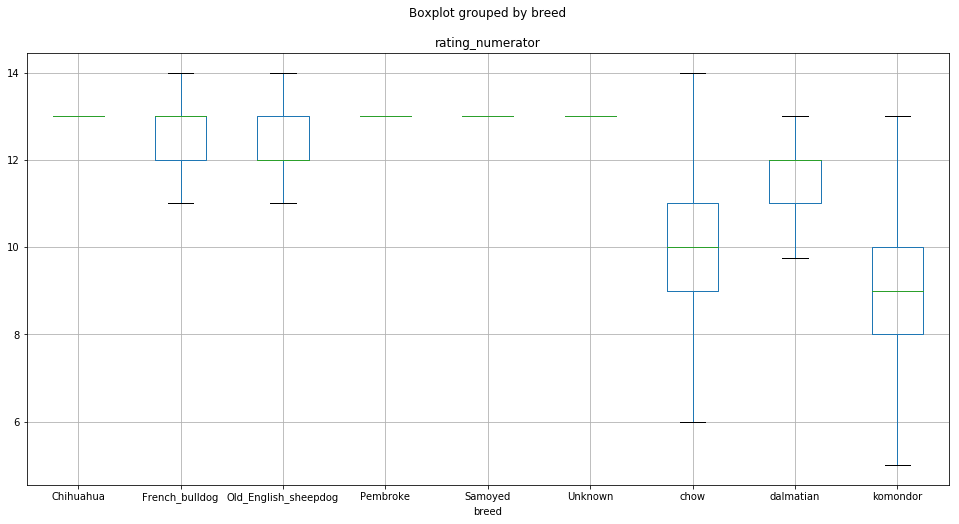

In [246]:
# Create box plots
twitter_archive_master.boxplot(column='rating_numerator', by='breed', showfliers=False, figsize=(16,8));

Here we can see that some box plots appears as lines, that is because there is not much data about them, so we have one or two ratings that are the same.